<a href="https://colab.research.google.com/github/aadumbuya/emergency_response/blob/main/Alhassan_Alimamy_Dumbuya_Summative_1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPEED-RELATED HIGHWAY ACCIDENT

Analysis of Vehicle Collisions in the UK
The purposes of this analysis are as follows:

To answer meaningful questions about vehicle collisions in UK between 2004 and 2014
To demonstrate my ability to understand data, its structure and types
To demonstrate my ability in data wrangling, dataframe manipulations and various joins
To understand the importance of missing values

https://www.kaggle.com/code/datasciencecat/analysis-of-vehicle-collisions-in-the-uk/notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
from sklearn.datasets import make_moons
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import time
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Loading train and test dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Accidents0514.csv')

In [ ]:
# Assuming 'data' is the DataFrame loaded from the CSV file
# Split the data into training and testing sets
train_frame, test_frame = train_test_split(data, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# chech the size of the dataset
train_frame.shape

(1312477, 32)

In [ ]:
test_frame.shape

(328120, 32)

In [ ]:
train_frame.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
936314,201005EE04343,341000.0,391670.0,-2.889230,53.418507,5,3,2,1,18/07/2010,...,0,4,1,1,1,0,0,1,2,E01006571
1268864,201220H002852,405200.0,303180.0,-1.924622,52.626329,20,3,2,1,30/03/2012,...,0,4,1,1,1,0,0,1,1,E01010254
680146,200842I348810,600380.0,223240.0,0.909376,51.871677,42,3,2,1,02/10/2008,...,0,0,1,1,1,0,0,1,2,E01021637
178575,2005610005905,314860.0,189390.0,-3.230605,51.596851,61,3,2,2,22/01/2005,...,0,0,1,2,2,0,0,2,1,W01001368
738609,200897ND70410,277310.0,661610.0,-3.960403,55.832120,97,3,2,1,20/10/2008,...,0,0,1,2,2,0,0,1,1,NaN


In [ ]:
test_frame.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
144485,200545MO65661,511830.0,147390.0,-0.400258,51.214712,45,3,1,1,15/03/2005,...,0,0,1,1,2,0,0,2,1,E01030555
779920,2009070017226,377450.0,361880.0,-2.338671,53.153556,7,2,2,3,18/01/2009,...,0,0,1,1,2,0,0,2,1,E01018439
1067691,201101LX50672,530780.0,174640.0,-0.119085,51.455587,1,3,2,2,14/09/2011,...,0,0,1,1,1,0,0,1,1,E01003018
347587,2006470607621,532550.0,123940.0,-0.112363,50.999528,47,3,2,1,09/09/2006,...,0,4,1,1,1,0,0,1,2,E01031762
1202088,2011930002109,302960.0,718890.0,-3.571894,56.352416,93,3,2,1,28/07/2011,...,0,0,1,2,2,0,0,2,1,NaN


# Data Cleaning and Transformation

In [ ]:
#Get information for the dataset such as type and non null counts
print(train_frame.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1312477 entries, 936314 to 121958
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1312477 non-null  object 
 1   Location_Easting_OSGR                        1312380 non-null  float64
 2   Location_Northing_OSGR                       1312380 non-null  float64
 3   Longitude                                    1312380 non-null  float64
 4   Latitude                                     1312380 non-null  float64
 5   Police_Force                                 1312477 non-null  int64  
 6   Accident_Severity                            1312477 non-null  int64  
 7   Number_of_Vehicles                           1312477 non-null  int64  
 8   Number_of_Casualties                         1312477 non-null  int64  
 9   Date                                         13

In [ ]:
#Get information for the dataset such as type and non null counts
test_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328120 entries, 144485 to 842595
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               328120 non-null  object 
 1   Location_Easting_OSGR                        328106 non-null  float64
 2   Location_Northing_OSGR                       328106 non-null  float64
 3   Longitude                                    328106 non-null  float64
 4   Latitude                                     328106 non-null  float64
 5   Police_Force                                 328120 non-null  int64  
 6   Accident_Severity                            328120 non-null  int64  
 7   Number_of_Vehicles                           328120 non-null  int64  
 8   Number_of_Casualties                         328120 non-null  int64  
 9   Date                                         328120 non-nul

       Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           1.312380e+06            1.312380e+06  1.312380e+06   
mean            4.396104e+05            2.992657e+05 -1.436887e+00   
std             9.549475e+04            1.615465e+05  1.403889e+00   
min             6.498000e+04            1.029000e+04 -7.515933e+00   
25%             3.755300e+05            1.781100e+05 -2.367256e+00   
50%             4.403600e+05            2.665500e+05 -1.398821e+00   
75%             5.230500e+05            3.970200e+05 -2.214007e-01   
max             6.555400e+05            1.208800e+06  1.762010e+00   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  1.312380e+06  1.312477e+06       1.312477e+06        1.312477e+06   
mean   5.258131e+01  3.082904e+01       2.838559e+00        1.831170e+00   
std    1.454632e+00  2.554584e+01       4.019095e-01        7.159366e-01   
min    4.991294e+01  1.000000e+00       1.000000e+00        1.000

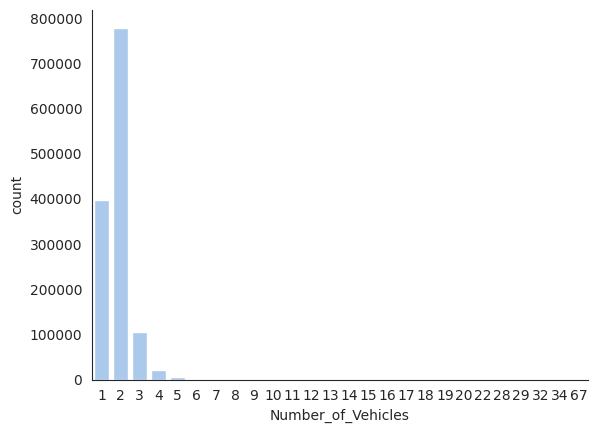

In [ ]:
print(train_frame.describe())

sns.set_palette("pastel")
sns.set_style("white")
sns.countplot(x='Number_of_Vehicles', data=train_frame)
sns.despine()

In [ ]:
train_frame.isna().sum()

,0
Accident_Index,0
Location_Easting_OSGR,97
Location_Northing_OSGR,97
Longitude,97
Latitude,97
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0


In [ ]:
# Fill the missing with the mean

# Fill missing values with the mean for numerical columns
for column in train_frame.select_dtypes(include=np.number):
  train_frame[column].fillna(train_frame[column].mean(), inplace=True)

for column in test_frame.select_dtypes(include=np.number):
  test_frame[column].fillna(test_frame[column].mean(), inplace=True)

# For categorical columns, you might want to fill with the mode (most frequent value) or a specific category.
# Example for a categorical column 'Category_Column':
# train_frame['Category_Column'].fillna(train_frame['Category_Column'].mode()[0], inplace=True)

# Check if there are still any missing values
print(train_frame.isna().sum())
print(test_frame.isna().sum())

Accident_Index                                     0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                             115
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

In [ ]:
# convert all strings to int

# Assuming you want to convert all string columns in your DataFrame to integers

# Iterate through each column
for column in train_frame.columns:
  if train_frame[column].dtype == object:  # Check if the column contains strings
    # Use LabelEncoder to convert strings to integers
    label_encoder = LabelEncoder()
    train_frame[column] = label_encoder.fit_transform(train_frame[column].astype(str))

for column in test_frame.columns:
  if test_frame[column].dtype == object:  # Check if the column contains strings
    # Use LabelEncoder to convert strings to integers
    label_encoder = LabelEncoder()
    test_frame[column] = label_encoder.fit_transform(test_frame[column].astype(str))


In [ ]:
# Replace NaN values in 'ON STREET NAME' with the most frequent value (mode) instead of the mean.
train_frame["Number_of_Casualties"].fillna(train_frame["Number_of_Casualties"].mode()[0], inplace=True) # Use mode for categorical data
test_frame["Number_of_Casualties"].fillna(train_frame["Number_of_Casualties"].mode()[0], inplace=True) # Use mode for categorical data

In [ ]:
train_frame.isna().sum()

,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0


# Building the Models

In [ ]:
train_frame.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
936314,749427,341000.0,391670.0,-2.889230,53.418507,5,3,2,1,2105,...,0,4,1,1,1,0,0,1,2,6535
1268864,1015150,405200.0,303180.0,-1.924622,52.626329,20,3,2,1,3489,...,0,4,1,1,1,0,0,1,1,10211
680146,544610,600380.0,223240.0,0.909376,51.871677,42,3,2,1,213,...,0,0,1,1,1,0,0,1,2,21570
178575,143071,314860.0,189390.0,-3.230605,51.596851,61,3,2,2,2520,...,0,0,1,2,2,0,0,2,1,34821
738609,591453,277310.0,661610.0,-3.960403,55.832120,97,3,2,1,2373,...,0,0,1,2,2,0,0,1,1,35403


In [ ]:
train_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1312477 entries, 936314 to 121958
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1312477 non-null  int64  
 1   Location_Easting_OSGR                        1312477 non-null  float64
 2   Location_Northing_OSGR                       1312477 non-null  float64
 3   Longitude                                    1312477 non-null  float64
 4   Latitude                                     1312477 non-null  float64
 5   Police_Force                                 1312477 non-null  int64  
 6   Accident_Severity                            1312477 non-null  int64  
 7   Number_of_Vehicles                           1312477 non-null  int64  
 8   Number_of_Casualties                         1312477 non-null  int64  
 9   Date                                         13

In [ ]:
train_frame.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
936314,749427,341000.0,391670.0,-2.889230,53.418507,5,3,2,1,2105,...,0,4,1,1,1,0,0,1,2,6535
1268864,1015150,405200.0,303180.0,-1.924622,52.626329,20,3,2,1,3489,...,0,4,1,1,1,0,0,1,1,10211
680146,544610,600380.0,223240.0,0.909376,51.871677,42,3,2,1,213,...,0,0,1,1,1,0,0,1,2,21570
178575,143071,314860.0,189390.0,-3.230605,51.596851,61,3,2,2,2520,...,0,0,1,2,2,0,0,2,1,34821
738609,591453,277310.0,661610.0,-3.960403,55.832120,97,3,2,1,2373,...,0,0,1,2,2,0,0,1,1,35403


In [ ]:
test_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328120 entries, 144485 to 842595
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               328120 non-null  int64  
 1   Location_Easting_OSGR                        328120 non-null  float64
 2   Location_Northing_OSGR                       328120 non-null  float64
 3   Longitude                                    328120 non-null  float64
 4   Latitude                                     328120 non-null  float64
 5   Police_Force                                 328120 non-null  int64  
 6   Accident_Severity                            328120 non-null  int64  
 7   Number_of_Vehicles                           328120 non-null  int64  
 8   Number_of_Casualties                         328120 non-null  int64  
 9   Date                                         328120 non-nul

Data Splitting

In [ ]:
X_train = train_frame.drop("Number_of_Vehicles",axis=1)
X_test = test_frame.drop("Number_of_Vehicles",axis=1)

y_train = train_frame["Number_of_Vehicles"]
y_test = test_frame["Number_of_Vehicles"]

Model Training

In [ ]:
#Baseline Method
# zero rule algorithm for classification
def zero_rule_algorithm_classification(train, test):
    output_values = [row["Number_of_Vehicles"] for index,row in train.iterrows()]
    prediction = max(set(output_values), key=output_values.count)
    # Change: Use the length of the 'test' DataFrame instead of the entire 'Number_of_Vehicles' column
    # This assumes 'test' DataFrame will have the same number of rows as desired in the prediction
    predicted = [prediction for i in range(len(test))]  # Updated line
    return predicted

# Update to pass X_test as the test data
predicted = zero_rule_algorithm_classification(train_frame, X_test)  # Updated line
print("Accuracy:",round(metrics.accuracy_score(y_test, predicted)* 100,2),"%")

Accuracy: 59.41 %


# 1. Vanilla Model

In [ ]:
# vanilla model

# Assuming you have already defined X_train, y_train, X_test, y_test

# 1. Convert the target variable to binary (0 or 1)
# You'll need to define a threshold to separate the values into two classes
threshold = 1  # Example threshold: Vehicles > 1 are considered class 1, otherwise 0
train_frame['Binary_Vehicles'] = (train_frame['Number_of_Vehicles'] > threshold).astype(int)
test_frame['Binary_Vehicles'] = (test_frame['Number_of_Vehicles'] > threshold).astype(int)

# 2. Update X_train, y_train, X_test, y_test
X_train = train_frame.drop(['Number_of_Vehicles', 'Binary_Vehicles'], axis=1)
X_test = test_frame.drop(['Number_of_Vehicles', 'Binary_Vehicles'], axis=1)
y_train = train_frame['Binary_Vehicles']
y_test = test_frame['Binary_Vehicles']

# Identify columns with 'object' dtype (likely containing strings or dates)
object_columns = X_train.select_dtypes(include=['object']).columns

# Identify columns with 'object' dtype (likely containing strings or dates)
object_columns = X_train.select_dtypes(include=['object']).columns

# Convert date columns to numerical representation using Label Encoding
label_encoder = LabelEncoder()
for col in object_columns:
    # Check if column contains date-like strings. This is a basic check and might need adjustment.
    if any(X_train[col].str.contains('/', na=False)):
        # Convert to datetime objects if possible, then to ordinal values
        try:
            X_train[col] = pd.to_datetime(X_train[col]).apply(lambda date: date.toordinal())
            X_test[col] = pd.to_datetime(X_test[col]).apply(lambda date: date.toordinal())
        except ValueError:
            # If not a valid datetime, fit LabelEncoder on combined data and then transform
            all_values = pd.concat([X_train[col], X_test[col]]).unique()
            label_encoder.fit(all_values)  # Fit on combined values
            X_train[col] = label_encoder.transform(X_train[col])
            X_test[col] = label_encoder.transform(X_test[col])
    else:
        # For other object columns, fit LabelEncoder on combined data and then transform
        all_values = pd.concat([X_train[col], X_test[col]]).unique()
        label_encoder.fit(all_values)  # Fit on combined values
        X_train[col] = label_encoder.transform(X_train[col])
        X_test[col] = label_encoder.transform(X_test[col])

# Vanilla Model (Simple Neural Network)
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # use sigmoid for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change loss and metrics for classification

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predictions
y_pred = model.predict(X_test)


Epoch 1/10
41015/41015 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.6209 - loss: 787.1042
Epoch 2/10
41015/41015 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.6960 - loss: 0.6142
Epoch 3/10
41015/41015 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - accuracy: 0.6968 - loss: 0.6136
Epoch 4/10
41015/41015 ━━━━━━━━━━━━━━━━━━━━ 71s 2ms/step - accuracy: 0.6970 - loss: 0.6134
Epoch 5/10
41015/41015 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.6958 - loss: 0.6144
Epoch 6/10
41015/41015 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 0.6966 - loss: 0.6137
Epoch 7/10
41015/41015 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.6962 - loss: 0.6141
Epoch 8/10
41015/41015 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.6966 - loss: 0.6137
Epoch 9/10
41015/41015 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.6973 - loss: 0.6131
Epoch 10/10
41015/41015 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.6964 - loss: 0.6139
10254/10254 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


Confusion Matrix:
[[     0  99460]
 [     0 228660]]


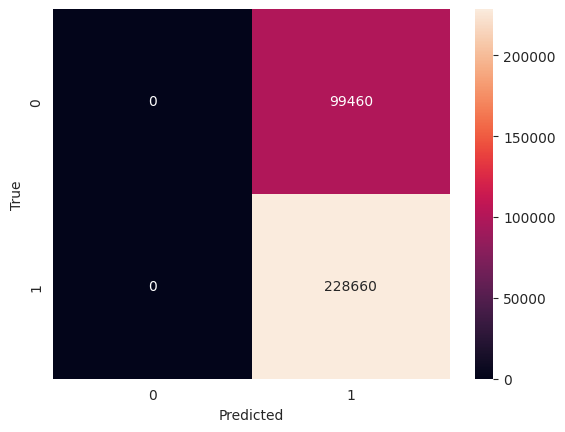

In [ ]:
# confusion matrix

y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

cm = confusion_matrix(y_test, y_pred_classes)

print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# save model
import pickle
pickle.dump(model, open('vanilla.pkl', 'wb'))

# 2. Second model with L1 regularisation with early stopping and Adam optimiser
Here, I will use early stopping with L1 to see if the model performance increases. Also this uses Adam optimiser.

Epoch 1/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - accuracy: 0.5826 - loss: 274.0394 - val_accuracy: 0.6969 - val_loss: 0.8491
Epoch 2/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.6962 - loss: 0.7925 - val_accuracy: 0.6969 - val_loss: 0.6243
Epoch 3/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.6957 - loss: 0.6411 - val_accuracy: 0.6969 - val_loss: 0.6289
Epoch 4/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.6965 - loss: 0.6204 - val_accuracy: 0.6969 - val_loss: 0.6152
Epoch 5/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 91s 2ms/step - accuracy: 0.6966 - loss: 0.6194 - val_accuracy: 0.6969 - val_loss: 0.6152
Epoch 6/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.6971 - loss: 0.6150 - val_accuracy: 0.6969 - val_loss: 0.6152
Epoch 7/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - accuracy: 0.6965 - loss: 0.6155 - val_accuracy: 0.6969 - val_loss: 0.6151
Epoch 8/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy

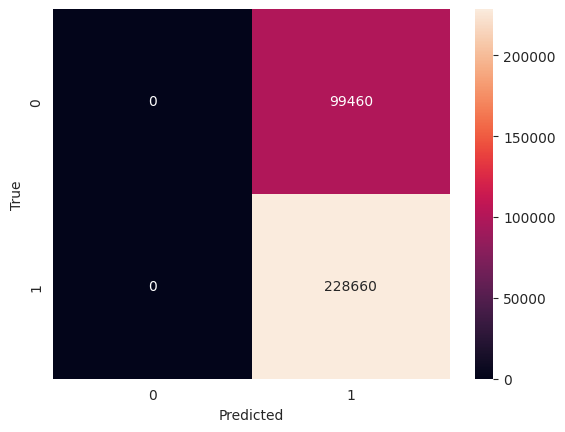

In [ ]:
# L1 regularization with early stopping and Adam optimizer

# Second Model with L1 Regularization, Early Stopping, and Adam Optimizer
model_l1 = Sequential()
model_l1.add(Dense(32, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l1(0.01)))  # L1 regularization
model_l1.add(Dense(16, activation='relu', kernel_regularizer=l1(0.01)))
model_l1.add(Dense(1, activation='sigmoid'))

model_l1.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Early stopping

history_l1 = model_l1.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

y_pred_l1 = model_l1.predict(X_test)
y_pred_classes_l1 = (y_pred_l1 > 0.5).astype(int)

cm_l1 = confusion_matrix(y_test, y_pred_classes_l1)

print("Confusion Matrix (L1 Regularization):")
print(cm_l1)

sns.heatmap(cm_l1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# save model
pickle.dump(model_l1, open('l1.pkl', 'wb'))

# 3. Using L1 with RMSPOP Optimiser

Epoch 1/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 71s 2ms/step - accuracy: 0.6474 - loss: 598.2083 - val_accuracy: 0.6969 - val_loss: 0.6208
Epoch 2/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 88s 2ms/step - accuracy: 0.6903 - loss: 0.6335 - val_accuracy: 0.6969 - val_loss: 0.6243
Epoch 3/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - accuracy: 0.6932 - loss: 0.6281 - val_accuracy: 0.6969 - val_loss: 0.6210
Epoch 4/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - accuracy: 0.6957 - loss: 0.6233 - val_accuracy: 0.6969 - val_loss: 0.6212
Epoch 5/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step - accuracy: 0.6955 - loss: 0.6221 - val_accuracy: 0.6969 - val_loss: 0.6211
Epoch 6/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.6968 - loss: 0.6211 - val_accuracy: 0.6969 - val_loss: 0.6211
10254/10254 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
Confusion Matrix (L1 Regularization with RMSprop):
[[     0  99460]
 [     0 228660]]


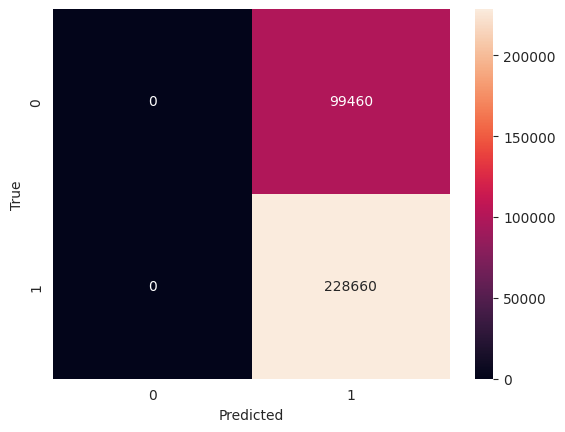

In [ ]:
# L1 with RMSPOP Optimiser

# 3. Using L1 with RMSprop Optimizer
model_l1_rmsprop = Sequential()
model_l1_rmsprop.add(Dense(32, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l1(0.01)))
model_l1_rmsprop.add(Dense(16, activation='relu', kernel_regularizer=l1(0.01)))
model_l1_rmsprop.add(Dense(1, activation='sigmoid'))

model_l1_rmsprop.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_l1_rmsprop = model_l1_rmsprop.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

y_pred_l1_rmsprop = model_l1_rmsprop.predict(X_test)
y_pred_classes_l1_rmsprop = (y_pred_l1_rmsprop > 0.5).astype(int)

cm_l1_rmsprop = confusion_matrix(y_test, y_pred_classes_l1_rmsprop)

print("Confusion Matrix (L1 Regularization with RMSprop):")
print(cm_l1_rmsprop)

sns.heatmap(cm_l1_rmsprop, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# save model
pickle.dump(model_l1_rmsprop, open('l1_rmsprop.pkl', 'wb'))

# 4. Using L1 without Early Stopping

Epoch 1/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - accuracy: 0.5823 - loss: 421.5419 - val_accuracy: 0.6962 - val_loss: 24.6573
Epoch 2/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.6408 - loss: 8.9593 - val_accuracy: 0.6969 - val_loss: 0.6284
Epoch 3/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 92s 2ms/step - accuracy: 0.6958 - loss: 0.6386 - val_accuracy: 0.6969 - val_loss: 0.6310
Epoch 4/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - accuracy: 0.6962 - loss: 0.6240 - val_accuracy: 0.6969 - val_loss: 0.6152
Epoch 5/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.6961 - loss: 0.6192 - val_accuracy: 0.6969 - val_loss: 0.6151
Epoch 6/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.6953 - loss: 0.6223 - val_accuracy: 0.6969 - val_loss: 0.6151
Epoch 7/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.6957 - loss: 0.6184 - val_accuracy: 0.6969 - val_loss: 0.6152
Epoch 8/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accurac

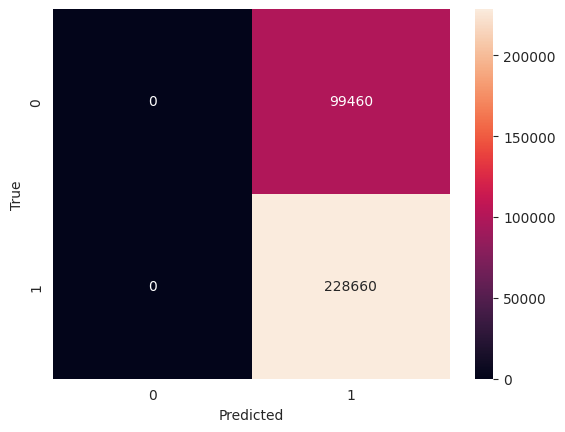

In [ ]:
# L1 without Early Stopping

# 4. Using L1 without Early Stopping
model_l1_no_early_stopping = Sequential()
model_l1_no_early_stopping.add(Dense(32, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l1(0.01)))
model_l1_no_early_stopping.add(Dense(16, activation='relu', kernel_regularizer=l1(0.01)))
model_l1_no_early_stopping.add(Dense(1, activation='sigmoid'))

model_l1_no_early_stopping.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_l1_no_early_stopping = model_l1_no_early_stopping.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

y_pred_l1_no_early_stopping = model_l1_no_early_stopping.predict(X_test)
y_pred_classes_l1_no_early_stopping = (y_pred_l1_no_early_stopping > 0.5).astype(int)

cm_l1_no_early_stopping = confusion_matrix(y_test, y_pred_classes_l1_no_early_stopping)

print("Confusion Matrix (L1 Regularization without Early Stopping):")
print(cm_l1_no_early_stopping)

sns.heatmap(cm_l1_no_early_stopping, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# save model
pickle.dump(model_l1_no_early_stopping, open('l1_no_early_stopping.pkl', 'wb'))

# 5. L2 Regularisation model without early stopping

Epoch 1/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 76s 2ms/step - accuracy: 0.5821 - loss: 453.2343 - val_accuracy: 0.6918 - val_loss: 0.7502
Epoch 2/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 88s 2ms/step - accuracy: 0.6954 - loss: 0.6509 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 3/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 71s 2ms/step - accuracy: 0.6961 - loss: 0.6141 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 4/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.6961 - loss: 0.6142 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 5/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 91s 2ms/step - accuracy: 0.6969 - loss: 0.6135 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 6/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 0.6958 - loss: 0.6144 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 7/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.6960 - loss: 0.6143 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 8/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy

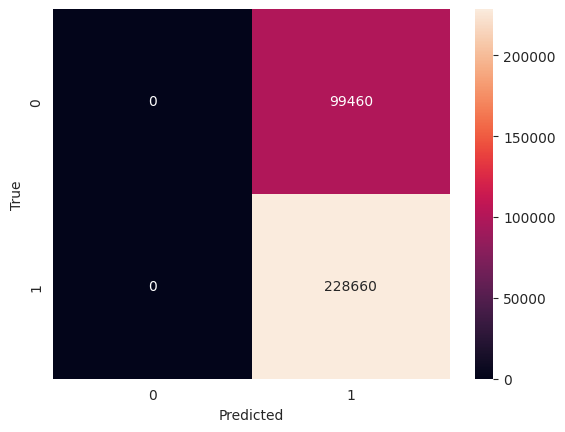

In [ ]:
# 5. L2 Regularization model without early stopping

# 5. Using L2 without Early Stopping
model_l2_no_early_stopping = Sequential()
model_l2_no_early_stopping.add(Dense(32, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))
model_l2_no_early_stopping.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model_l2_no_early_stopping.add(Dense(1, activation='sigmoid'))

model_l2_no_early_stopping.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_l2_no_early_stopping = model_l2_no_early_stopping.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

y_pred_l2_no_early_stopping = model_l2_no_early_stopping.predict(X_test)
y_pred_classes_l2_no_early_stopping = (y_pred_l2_no_early_stopping > 0.5).astype(int)

cm_l2_no_early_stopping = confusion_matrix(y_test, y_pred_classes_l2_no_early_stopping)

print("Confusion Matrix (L2 Regularization without Early Stopping):")
print(cm_l2_no_early_stopping)

sns.heatmap(cm_l2_no_early_stopping, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# save models
pickle.dump(model_l2_no_early_stopping, open('l2_no_early_stopping.pkl', 'wb'))

# 6. L2 with RMSPOP Optimiser with early stopping

Epoch 1/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.6304 - loss: 521.4816 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 2/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 0.6961 - loss: 0.6142 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 3/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.6961 - loss: 0.6141 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 4/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.6963 - loss: 0.6140 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 5/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.6965 - loss: 0.6138 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 6/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 89s 2ms/step - accuracy: 0.6958 - loss: 0.6144 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 7/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.6958 - loss: 0.6144 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 8/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy

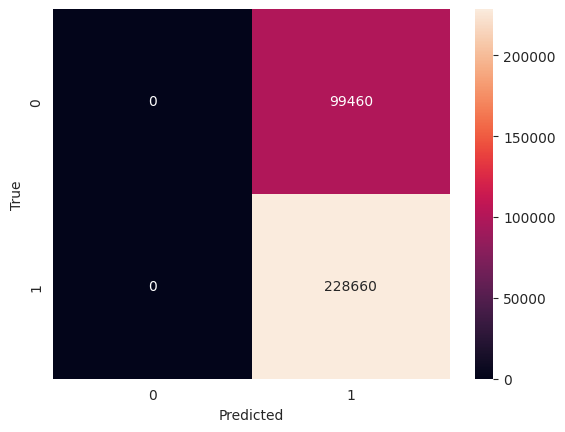

In [ ]:
# 6. L2 with RMSprop Optimizer with early stopping

# 6. Using L2 with RMSprop Optimizer and Early Stopping
model_l2_rmsprop_early_stopping = Sequential()
model_l2_rmsprop_early_stopping.add(Dense(32, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))
model_l2_rmsprop_early_stopping.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model_l2_rmsprop_early_stopping.add(Dense(1, activation='sigmoid'))

model_l2_rmsprop_early_stopping.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_l2_rmsprop_early_stopping = model_l2_rmsprop_early_stopping.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

y_pred_l2_rmsprop_early_stopping = model_l2_rmsprop_early_stopping.predict(X_test)
y_pred_classes_l2_rmsprop_early_stopping = (y_pred_l2_rmsprop_early_stopping > 0.5).astype(int)

cm_l2_rmsprop_early_stopping = confusion_matrix(y_test, y_pred_classes_l2_rmsprop_early_stopping)

print("Confusion Matrix (L2 Regularization with RMSprop and Early Stopping):")
print(cm_l2_rmsprop_early_stopping)

sns.heatmap(cm_l2_rmsprop_early_stopping, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# save models
pickle.dump(model_l2_rmsprop_early_stopping, open('l2_rmsprop_early_stopping.pkl', 'wb'))

# 7. L2 with drop out
Implementing L2 with drop out to check if the acccuracy is better

Epoch 1/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.6648 - loss: 1435.5120 - val_accuracy: 0.6969 - val_loss: 0.6231
Epoch 2/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 76s 2ms/step - accuracy: 0.6961 - loss: 0.6278 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 3/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.6962 - loss: 0.6141 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 4/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 0.6964 - loss: 0.6139 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 5/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.6965 - loss: 0.6138 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 6/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 76s 2ms/step - accuracy: 0.6964 - loss: 0.6139 - val_accuracy: 0.6969 - val_loss: 0.6135
Epoch 7/50
32812/32812 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.6967 - loss: 0.6136 - val_accuracy: 0.6969 - val_loss: 0.6135
10254/10254 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
Confusion Matrix (L2

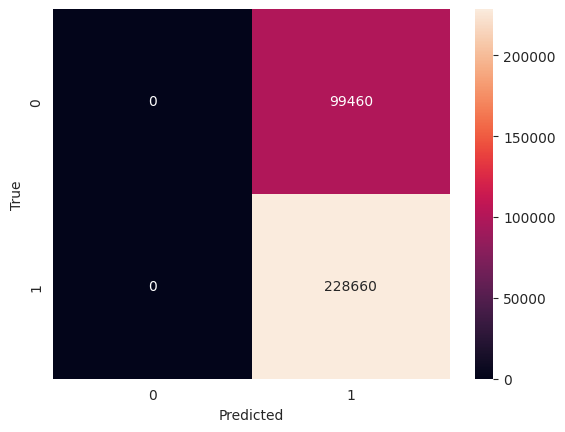

In [ ]:
# 7. L2 with Dropout
model_l2_dropout = Sequential()
model_l2_dropout.add(Dense(32, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))
model_l2_dropout.add(Dropout(0.5))  # Add dropout layer with a dropout rate of 0.5
model_l2_dropout.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model_l2_dropout.add(Dropout(0.5))  # Add dropout layer with a dropout rate of 0.5
model_l2_dropout.add(Dense(1, activation='sigmoid'))

model_l2_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_l2_dropout = model_l2_dropout.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

y_pred_l2_dropout = model_l2_dropout.predict(X_test)
y_pred_classes_l2_dropout = (y_pred_l2_dropout > 0.5).astype(int)

cm_l2_dropout = confusion_matrix(y_test, y_pred_classes_l2_dropout)

print("Confusion Matrix (L2 Regularization with Dropout):")
print(cm_l2_dropout)

sns.heatmap(cm_l2_dropout, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# save models
pickle.dump(model_l2_dropout, open('l2_dropout.pkl', 'wb'))

#Model Evaluation

In [ ]:
# model evaluation

from sklearn.metrics import classification_report

# Evaluate the models using classification_report
print("Vanilla Model Classification Report:")
print(classification_report(y_test, y_pred_classes))

print("L1 Regularization Classification Report:")
print(classification_report(y_test, y_pred_classes_l1))

print("L1 Regularization with RMSprop Classification Report:")
print(classification_report(y_test, y_pred_classes_l1_rmsprop))

print("L1 Regularization without Early Stopping Classification Report:")
print(classification_report(y_test, y_pred_classes_l1_no_early_stopping))

print("L2 Regularization without Early Stopping Classification Report:")
print(classification_report(y_test, y_pred_classes_l2_no_early_stopping))

print("L2 Regularization with RMSprop and Early Stopping Classification Report:")
print(classification_report(y_test, y_pred_classes_l2_rmsprop_early_stopping))

print("L2 Regularization with Dropout Classification Report:")
print(classification_report(y_test, y_pred_classes_l2_dropout))

Vanilla Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     99460
           1       0.70      1.00      0.82    228660

    accuracy                           0.70    328120
   macro avg       0.35      0.50      0.41    328120
weighted avg       0.49      0.70      0.57    328120

L1 Regularization Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     99460
           1       0.70      1.00      0.82    228660

    accuracy                           0.70    328120
   macro avg       0.35      0.50      0.41    328120
weighted avg       0.49      0.70      0.57    328120

L1 Regularization with RMSprop Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     99460
           1       0.70      1.00      0.82    228660

    accuracy                           0.70    328

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred_classes)
precision = metrics.precision_score(y_test, y_pred_classes)
recall = metrics.recall_score(y_test, y_pred_classes)
f1 = metrics.f1_score(y_test, y_pred_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6968791905400463
Precision: 0.6968791905400463
Recall: 1.0
F1-score: 0.8213657099752146


In [ ]:
def evaluate_model(model, testX, testY):
  """
  Evaluates the given model on the test data.

  Args:
    model: The trained Keras model.
    testX: The test data input.
    testY: The test data labels.

  Returns:
    A tuple containing the test loss and test accuracy.
  """
  loss, accuracy = model.evaluate(testX, testY, verbose=0)
  return loss, accuracy

In [ ]:
# see the first row of X_test

print(X_test.head(1))

        Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
144485           28625               511830.0                147390.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
144485  -0.400258  51.214712            45                  3   

        Number_of_Casualties  Date  Day_of_Week  ...  \
144485                     1  1700            3  ...   

        Pedestrian_Crossing-Human_Control  \
144485                                  0   

        Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
144485                                        0                 1   

        Weather_Conditions  Road_Surface_Conditions  \
144485                   1                        2   

        Special_Conditions_at_Site  Carriageway_Hazards  Urban_or_Rural_Area  \
144485                           0                    0                    2   

        Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  
144485                    

In [ ]:
# make predictions

# Assuming you have already defined X_test and your trained model (e.g., model_l2_dropout)

# Get the first row of X_test as a NumPy array
first_row = X_test.iloc[[0]].values

# Make a prediction for the first row
# Replace 'model' with your actual trained model (e.g., model_l2_dropout)
prediction = model_l2_dropout.predict(first_row)

# Convert the prediction to a class label (0 or 1)
predicted_class = (prediction > 0.5).astype(int)[0][0]

print("Prediction for the first row:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction for the first row: 1


In [ ]:
# see whether prediction was correct or wrong

# Assuming you have already defined y_test and y_pred_classes (or similar)

# Get the first row of X_test as a NumPy array
first_row = X_test.iloc[[0]].values

# Make a prediction for the first row
# Replace 'model' with 'model_l2_dropout'
prediction = model_l2_dropout.predict(first_row)

# Convert the prediction to a class label (0 or 1)
predicted_class = (prediction > 0.5).astype(int)[0][0]

# Get the true label for the first row
true_class = y_test.iloc[0]

# Check if the prediction was correct
if predicted_class == true_class:
    print("Prediction for the first row is CORRECT.")
else:
    print("Prediction for the first row is WRONG.")

print("Predicted class:", predicted_class)
print("True class:", true_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction for the first row is WRONG.
Predicted class: 1
True class: 0


In [ ]:
# save the model

drive.mount('/content/drive')

# Save the model to your Google Drive
model.save('/content/drive/MyDrive/my_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
